Моде́ль Ло́тки — Вольте́рры — модель взаимодействия двух видов типа «хищник — жертва». В математической форме она принимает вид:

${\displaystyle {\frac  {dx}{dt}}=(\alpha -\beta y)x},$

${\displaystyle {\frac {dy}{dt}}=(-\gamma +\delta x)y},$

где ${\displaystyle x}$ — количество жертв, ${\displaystyle y}$ — количество хищников, ${\displaystyle t}$ — время, ${\displaystyle \alpha ,\beta ,\gamma ,\delta }$ — коэффициенты, отражающие взаимодействия между видами.

Для стационарной позиции ${\displaystyle {\bar {x}}>0,{\bar {y}}>0}$ изменение численности популяции равно нулю. Следовательно:

${\displaystyle \alpha {\bar {x}}-\beta {\bar {x}}{\bar {y}}=0}$,

${\displaystyle -\gamma {\bar {y}}+\delta {\bar {x}}{\bar {y}}=0}$,

из чего следует, что стационарная точка системы, вокруг которой происходят колебания, определяется следующим образом:

${\displaystyle {\bar {x}}={\frac {\gamma }{\delta }}}$,

${\displaystyle {\bar {y}}={\frac {\alpha }{\beta }}}$.

Далее выполнив некоторые преобразования над системой:

${\displaystyle {\frac  {dx}{dt}}=(\alpha -\beta y)x},$

${\displaystyle {\frac {dy}{dt}}=(-\gamma +\delta x)y},$

Получаем:

${\displaystyle {y}(-\gamma+\delta{x}){dx}+{x}(\beta{y}-\alpha){dy}} = 0$

Поделив на ${\displaystyle xy}$ получаем:

${\displaystyle ({\frac {-\gamma}{x}}+\delta){dx}+(\beta-{\frac{\alpha}{y}}){dy}} = 0$

Проинтегрировав, получаем:

${\displaystyle -\gamma{ln(|x|)}+\delta{x}+\beta{y}-\alpha{ln(|y|)}+ C}=0$

Где С - некоторая константа, одинаковая для одинаковых ${\displaystyle \alpha, \beta, \gamma, \delta}$.


Теперь сформулируем критерий устойчивости системы:

Количество "хищников" и "жертв" на пике должно отличаться не более чем на некоторую небольшую величину $\varepsilon$

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, minimize
from sympy import symbols, log, lambdify

In [226]:
def C(x, y, alpha, beta, gamma, delta):
    return gamma*log(x) - delta*x - beta*y  + alpha*log(y)

def F(x, y, alpha, beta, gamma, delta, C): 
    return delta*x + beta*y - gamma*log(x) - alpha*log(y) + C

def solve(parameters):
    alpha = parameters[0]
    beta  = parameters[1]
    gamma = parameters[2]
    delta = parameters[3]
    x_0 = 1
    y_0 = 1
    epsilon = 0.01  
    c = C(x_0, y_0, alpha, beta, gamma, delta) 
    limit_x = gamma/delta
    limit_y = alpha/beta
    
    f_x = F(symbols('x'), limit_y, alpha, beta, gamma, delta, c)    
    f_y = F(limit_x, symbols('y'), alpha, beta, gamma, delta, c)

    x_1 = fsolve(lambdify(symbols('x'), f_x, "math"), 0.001)
    x_2 = fsolve(lambdify(symbols('x'), f_x, "math"), 2 * limit_x)
    y_1 = fsolve(lambdify(symbols('y'), f_y, "math"), 0.001)
    y_2 = fsolve(lambdify(symbols('y'), f_y, "math"), 2 * limit_y)
    
    return(abs(max(abs(limit_x - y_1), abs(limit_x - y_2), abs(limit_y - x_1), abs(limit_y - x_2)) - epsilon))

In [227]:
start_alpha = 1
start_beta = 1
start_gamma = 1
start_delta = 1
start_parameters = [start_alpha, start_beta, start_gamma, start_delta]
solution = minimize(solve, start_parameters)
alpha = solution.x[0]
beta = solution.x[1]
gamma = solution.x[2]
delta = solution.x[3]
print(f"alpha = {alpha}\nbeta = {beta}\ngamma = {gamma}\ndelta = {delta}")

alpha = 1.013376149207093
beta = 1.0057458743250651
gamma = 1.013376149207093
delta = 1.0057458743250651


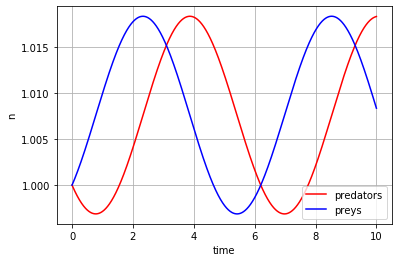

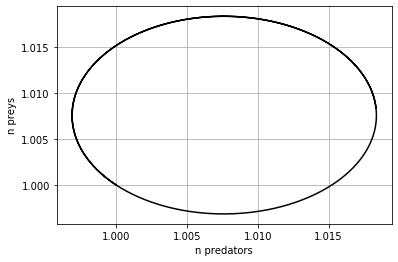

In [228]:
class Biome(object):
    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.0001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, gamma, delta):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('time')
        plt.ylabel('n')
        plt.plot(self.time, self.pred, label='predators', color='r')
        plt.plot(self.time, self.prey, label='preys', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('n predators')
        plt.ylabel('n preys')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()


def main():
    biome = Biome(tmax=10)
    #biome.run(2, 5, 2, 2)
    biome.run(alpha, beta, gamma, delta)
    biome.plot()
    biome.plot_cycle()

if __name__ == "__main__":
    main()
